## Mall-Customer-Segmentation

**Clustering** is one of the most common exploratory data analysis techniques used to understand the data structure. Clustering algorithms allow you to discover homogeneous subgroups within the dataset so that data points in each cluster are comparable and similar to each other based on a similarity measure like euclidean-based distance or correlation-based distance.

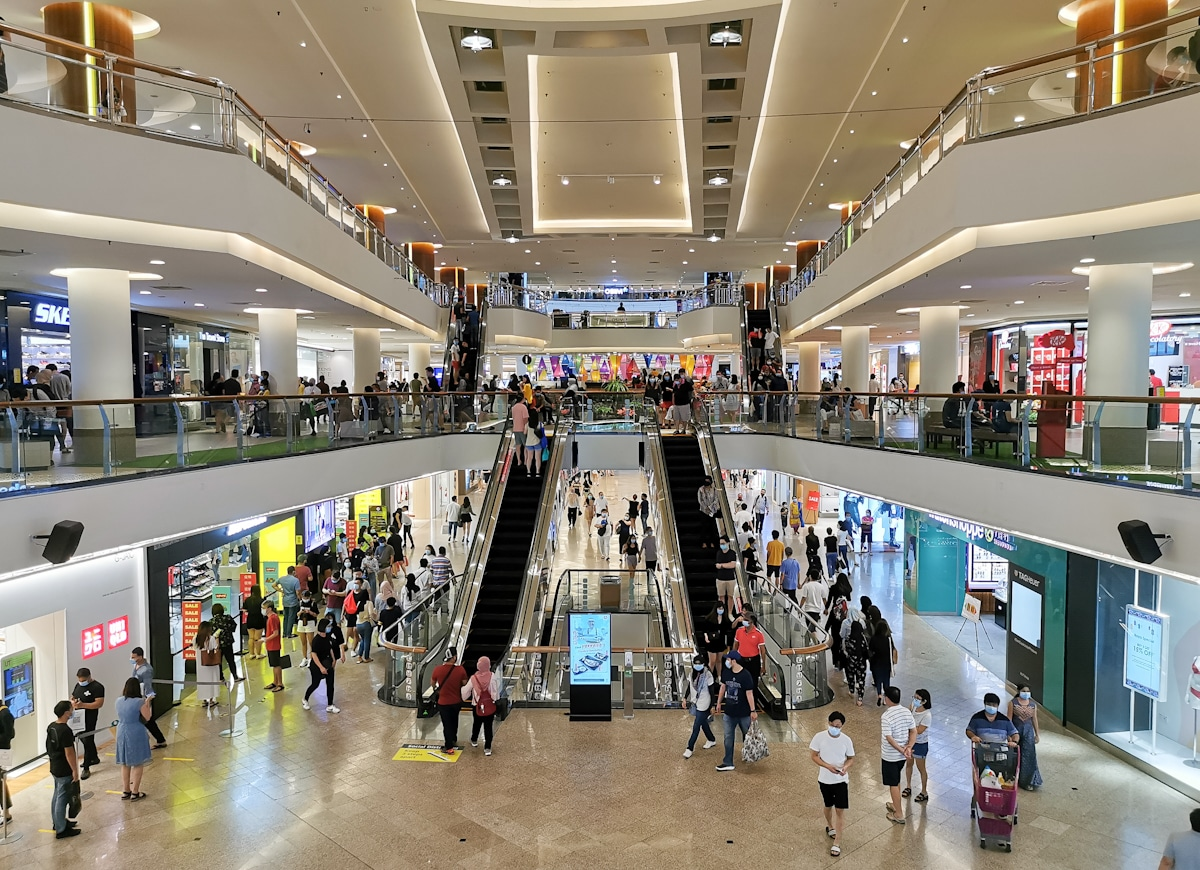

First, we'll import the libraries we will need, followed by loading the data.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans



### Exploring and cleaning dataset

In [3]:
#Load data
data = pd.read_csv('mall_customers.csv')

Let’s get the shape of the dataset:

In [4]:
# shape of the dataset
print(data.shape)

(200, 5)


Let’s preview that dataset by using the head() method:

In [5]:
# previewing the dataset
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Next, we can check for the missing values in the dataset. Pandas provide us with a built-in method isnull() which will help us to identify the missing values:

In [6]:
# printing the missing values
print(data.isnull().sum())

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


The output shows that the are no `null values`

Let us now use the `info()` method to get more information about the types of data each attribute has.

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


The output shows one column with string values (`object` in the `Dtype` column) and 4 numerical columns (`int64` in the `Dtype` column) in the dataset.

The output shows that there is now only one column with `categorical value` and the K-Means algorithm requires `numerical data`

Lets use  `Density plot` to view the distribution of our features:

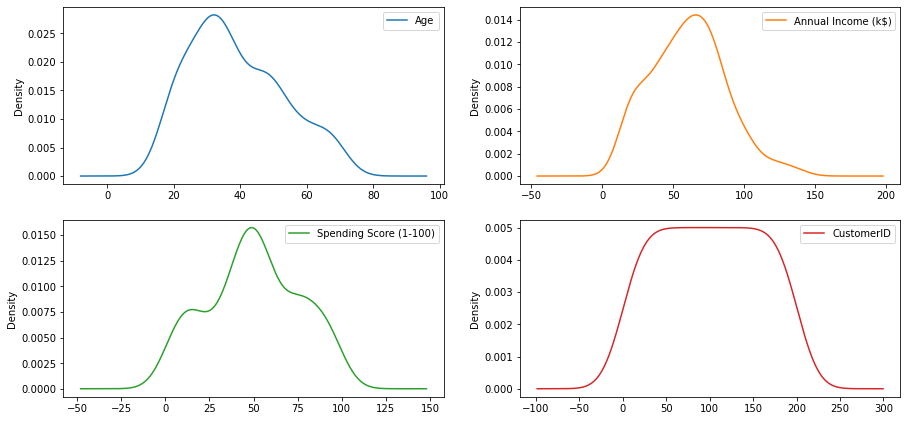

In [8]:
features = ['Age', 'Gender', 'Annual Income (k$)', 'Spending Score (1-100)','CustomerID'] # create a list of all numerical features
data[features].plot(kind='density', subplots=True, layout=(4, 2), sharex=False, figsize=(15, 15));

Lets use `Barplot` to view the distribution of gender column

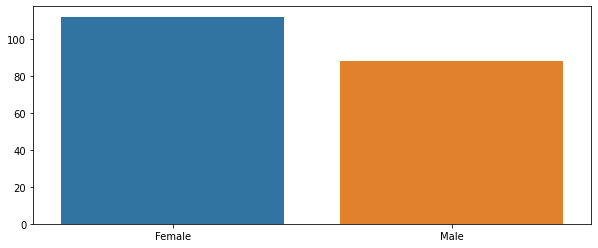

In [9]:
genders = data.Gender.value_counts()
#sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=genders.index, y=genders.values)
plt.show()

More female customers than male.

`Gender` is a discrete field (either male or female), and thus cannot be directly combined with a continuous space and measured in the same way. As a result, I have to removed Gender fields.

### Relationship between fearures

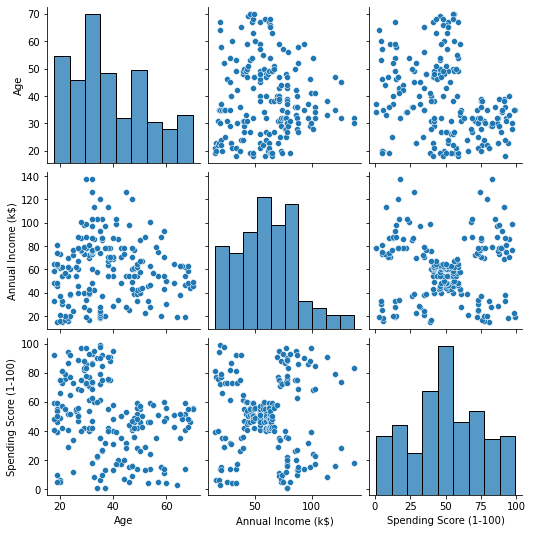

In [10]:
sns.pairplot(data=data[['Age','Annual Income (k$)','Spending Score (1-100)']] );

- The inverse relationship is fairly clear on Age and spending score. Interestingly, all of the highest spending individuals are between the ages 20 and 40.The decline in spending seems to drop off sharply for customers who are 40 years  and older
- The direct relationship between Age and Annual income is laso fairly clear. It is difficullt not clear which age group have high or lower income since there are datapoint everuwhere.
- It is difficult to identify a clear relationship between income and spending score, however, clusters do appear to form within the data.

## Feature engineering

Lets drop customer id and gender column

In [11]:
# droping the Gender variable from data set
data.drop(['CustomerID','Gender'], axis=1, inplace=True)

Lets preview our data after dropping those columns

In [12]:
data.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


## Applying K Means Clustering

Our dataset has 3 columns and it is not easy to view data in 3 dimensions. Therefore we will perform K Means clustering on two columns only. We will use the “Annual Income (K$)” and the “Spending Score (1-100)” columns for clustering the data.

###  Annual Income (k$​) by Spending Score (1-100)

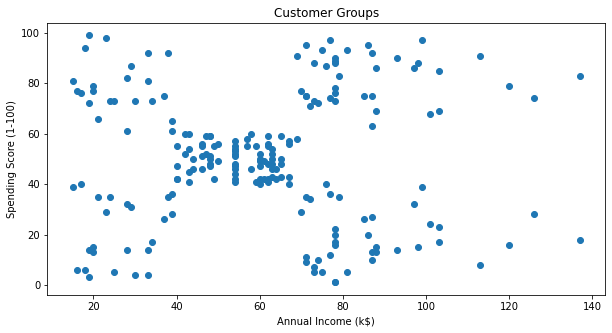

In [13]:
# stroing two attributes
df_1=data[['Annual Income (k$)', 'Spending Score (1-100)']]
# image size
plt.figure(figsize=(10,5))

# ploting scatered graph
plt.scatter(x= df_1['Annual Income (k$)'], y=df_1['Spending Score (1-100)'])
plt.title('Customer Groups')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)');

### Using Elbow method to get better K value

C:\Users\f5469511\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\f5469511\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


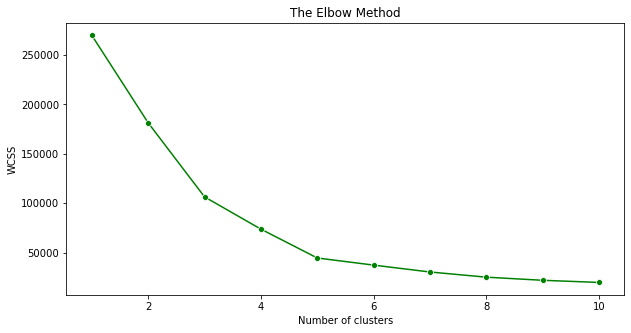

In [14]:
# to store WCSS
wcss = []

# for loop 
for i in range(1, 11):
    
    # k-mean cluster model for different k values
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df_1)
    
    # inertia method returns wcss for that model
    wcss.append(kmeans.inertia_)
    
# figure size
plt.figure(figsize=(10,5))
sns.lineplot(range(1, 11), wcss,marker='o',color='green')

# labeling
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

As you can see, the graph shows that we can use `K=5` for the K-Means algorithm

### Using silhouette_score to get better K value

In [15]:
no_of_clusters = [2, 3, 4, 5, 6,8,10]
  
for n_clusters in no_of_clusters:
  
    cluster = KMeans(n_clusters = n_clusters)
    cluster_labels = cluster.fit_predict(df_1)
  
    # The silhouette_score gives the 
    # average value for all the samples.
    silhouette_avg = silhouette_score(df_1, cluster_labels)
  
    print("For no of clusters =", n_clusters,
          " The average silhouette_score is :", silhouette_avg)
 

For no of clusters = 2  The average silhouette_score is : 0.2968969162503008
For no of clusters = 3  The average silhouette_score is : 0.46761358158775435
For no of clusters = 4  The average silhouette_score is : 0.4931963109249047
For no of clusters = 5  The average silhouette_score is : 0.553931997444648
For no of clusters = 6  The average silhouette_score is : 0.5379675585622219
For no of clusters = 8  The average silhouette_score is : 0.45704384633565154
For no of clusters = 10  The average silhouette_score is : 0.449795408266166


One way to select the number of clusters could be to choose the one with the higher overall average.
`k=5` seems to be the optimal number of clusters.

Silhouette_score ranges from **-1 to 1**
- If silhouette_score is
 -  **> 0.70**, the structure of the clusters is strong
 -  between **0.51 and 0.70** the structure is reasonable
 -  **< 0.51**, the structure of the clusters is poor


### Visualizing dataset clusters

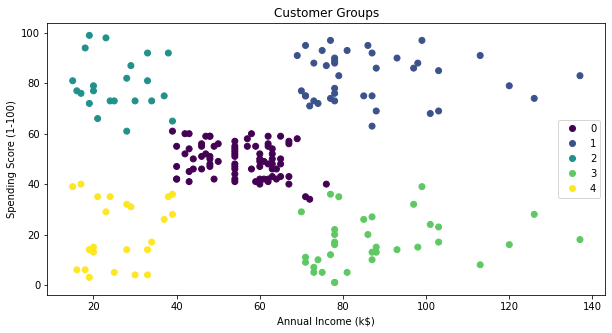

In [16]:
# k mean algorithm training
km = KMeans(n_clusters = 5)
km.fit(df_1)

# ploting the graph
plt.figure(figsize=(10,5))
scatter = plt.scatter(x= df_1.iloc[:, 0], y=df_1.iloc[:, 1], c=km.labels_)
plt.title('Customer Groups')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')

# creating the labels for different clusters
plt.legend(handles=scatter.legend_elements()[0], labels=[0, 1, 2, 3, 4,5]);

## Insights

- The customers at the top right corner are the customers with high income and high spending score. These are the customers that should be the target of the marketing campaigns as they are more likely to spend money.
- The customers at the bottom right are the ones with high income but low spending score. These are the customers that spend their money carefully. Therefore, it is not advisable to waste marketing resources on such customers.
- The customers in the middle are the customers with average income and average spending. Though these customers are not very high spenders, they are the largest group in terms of population and therefore should be targeted while marketing. 
- The customers at the bottom-left are low spenders and have low income as well, therefore they can be left out in marketing campaigns.
- The customers at the left-corner are high spenders and have low income as well.These are customers who like shopping and therefore should be targeted while marketing.